In [9]:
!pip list


Package                  Version
------------------------ ---------
absl-py                  1.4.0
aioboto3                 11.2.0
aiobotocore              2.5.0
aiohttp                  3.8.4
aioitertools             0.11.0
aiosignal                1.3.1
anyio                    3.6.2
appnope                  0.1.3
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
astunparse               1.6.3
async-timeout            4.0.2
attrs                    23.1.0
backcall                 0.2.0
beautifulsoup4           4.12.2
bleach                   6.0.0
blinker                  1.6.2
blis                     0.7.9
boto3                    1.26.76
botocore                 1.29.76
cachetools               5.3.0
catalogue                2.0.8
certifi                  2023.5.7
cffi                     1.15.1
charset-normalizer       3.1.0
click                    8.1.3
comm                     0.1.3
confection         

In [14]:
import tensorflow.keras.applications.vgg16.VGG16
import tensorflow.keras

ModuleNotFoundError: No module named 'tensorflow.keras.applications.vgg16.VGG16'

In [15]:
from mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from numpy import expand_dims
from tensorflow import keras

from keras_vggface.vggface import RESNET50
from keras.applications.imagenet_utils import preprocess_input
from keras_vggface.utils import decode_predictions
from scipy.spatial.distance import cosine

ImportError: cannot import name 'layer_utils' from 'keras.utils' (/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/__init__.py)

In [ ]:
def extract_face(filename, required_size=(224, 224)):
    pixels = plt.imread(filename)
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # We extract the bounding boxes from the first face.
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # Extracting the face from the image.
    face = pixels[x1: x2, y1: y2]
    # Resize the pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_arr = np.asarray(image)
    return face_arr

1/1 [==============================] - 0s 108ms/step


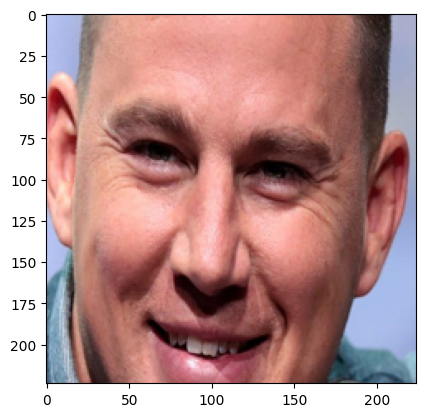

In [ ]:
# load the photo and extract the face
pixels = extract_face('channing_tatum.jpg')
# plot the extracted face
plt.imshow(pixels)
# show the plot
plt.show()

In [ ]:
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
 print('%s: %.3f%%' % (result[0], result[1]*100))

1346516/1346516 [==============================] - 0s 0us/step
b' Channing_Tatum': 99.726%
b' Nico_H\xc3\xbclkenberg': 0.052%
b' Shaun_Kenny-Dowall': 0.024%
b' James_Marsters': 0.008%
b' Antonio_Mohamed': 0.007%


In [ ]:
def get_embeddings(filenames):
  # Extract faces from all the file names
  faces = [extract_face(f) for f in filenames]
  # Convert faces into samples
  samples = np.asarray(faces, 'float32')
  #samples = expand_dims(samples, axis=0)
  #prepare the face for the model e.g. center pixels
  samples = preprocess_input(samples)
  # create a vggface model
  model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
  # perform prediction
  yhat = model.predict(samples)
  return yhat


In [ ]:
def is_match(k_embedding, c_embedding, thres = 0.5):
  score = cosine(k_embedding, c_embedding)
  if score <= thres:
    print('Face is a match', score, thres)
  else:
    print('Face is not a match', score, thres)

In [ ]:
# define filenames
filenames = ['sharon_stone1.jpg', 'sharon_stone2.jpg',
 'sharon_stone3.jpg', 'channing_tatum.jpg']
# get embeddings file filenames
embeddings = get_embeddings(filenames)
# define sharon stone
sharon_id = embeddings[0]
# verify known photos of sharon
print('Positive Tests')
is_match(embeddings[2], embeddings[0])
is_match(embeddings[2], embeddings[1])
# verify known photos of other people
print('Negative Tests')
is_match(embeddings[2], embeddings[3])

1/1 [==============================] - 1s 955ms/step
Face is not a match 0.5312154591083527 0.5
Face is not a match 0.9484815336763859 0.5
Face is not a match 0.9327225312590599 0.5
